In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob
%matplotlib inline

In [2]:
labels = ['All', 'Decoy', 'Native']
stats_template = '../combind_sherlock/bpp_outputs/stats/{}_{}.txt'

proteins = list(set([fname.split('/')[-1].split('_')[0]
                     for fname in glob(stats_template.format('*', '*'))]))
interactions = ['mcss', 'hbond', 'sb2', 'contact', 'pipi']

def reflect(x, y):
    x, y = np.array(x), np.array(y)
    center_x, center_y = x[(0<=x)*(x<1)], y[(0<=x)*(x<1)]
    left_x, left_y     = x[x < 0], y[x < 0]
    right_x, right_y   = x[x > 1], y[x > 1]
    center_y += left_y[::-1]
    center_y += right_y[::-1]
    return center_x, center_y

def extract_stats(fname):
    X = [[], [], []]
    Y = [[], [], []]
    with open(fname) as fp:
        for line in fp:
            if len(line.split(',')) != 3:
                continue
            dist, x, y = line.strip().split(',')
            dist, x, y = int(dist), float(x), float(y)
            X[dist+1] += [x]
            Y[dist+1] += [y]
    return X, Y

def plot_stats(ax, X, Y):
    for label, x, y in zip(labels, X, Y):
        if label == 'Decoy': continue
        c = 'b' if label == 'All' else 'g'
        x, y = reflect(x, y)
        ax.plot(x, y, c = c, lw = 3, label = label)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.set_yticks([])
        ax.set_yticklabels([])
        ax.set_xticks([0, 1])
        ax.set_xticklabels([0, 1], fontsize = 8)
        
def plot_energy(ax, X, Y):
    x, y2 = reflect(X[2], Y[2])
    x, y0 = reflect(X[0], Y[0])
    e = -np.log2(y2/y0)

    #ax[1].plot(x[e<=0], e[e<=0], c = 'g', lw = 4)
    #ax[1].plot(x[e>0], e[e>0], c = 'r', lw = 4)
    ax.plot(x, e, c = 'k', lw = 4)
    ax.plot([0, 1], [0, 0], '--', c = 'gray')

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([0, 1])
    ax.set_xticklabels([0, 1], fontsize = 16)

def plot_stats_energy(fname, title = None):
    X, Y = extract_stats(fname)
    f, ax = plt.subplots(1, 2, figsize = (12, 3))
    plot_stats(ax[0], X, Y)
    plot_energy(ax[1], X, Y)
    title = fname.split('/')[-1].split('.')[0] if title is None else title
    plt.suptitle(title)
    plt.show()

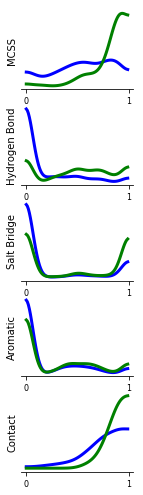

In [3]:
# Stats Figure
fig, ax = plt.subplots(5, 1, figsize = (2.0, 5*1.7))
protein = 'All'
for i, (name, interaction) in enumerate(zip(['MCSS', 'Hydrogen Bond', 'Salt Bridge', 'Aromatic', 'Contact'], 
                                            ['mcss', 'hbond', 'sb2', 'pipi', 'contact'])):
    fname = stats_template.format(protein, interaction)
    X, Y = extract_stats(fname)
    plot_stats(ax[i], X, Y)
    ax[i].set_ylabel(name)
    
plt.savefig('../figures/stats_fig/stats.pdf', dpi = 300, bbox_inches='tight')
plt.show()

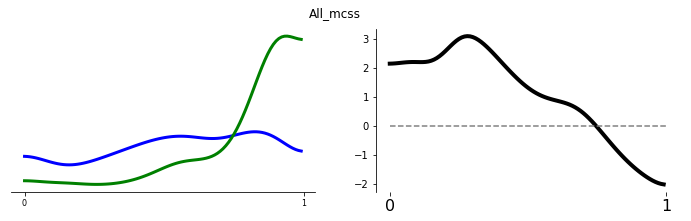

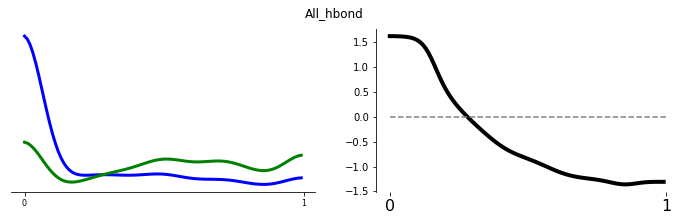

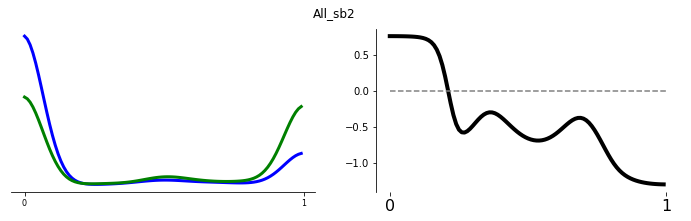

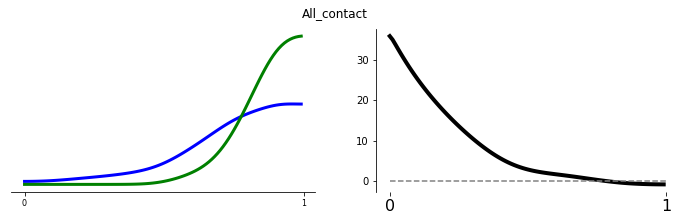

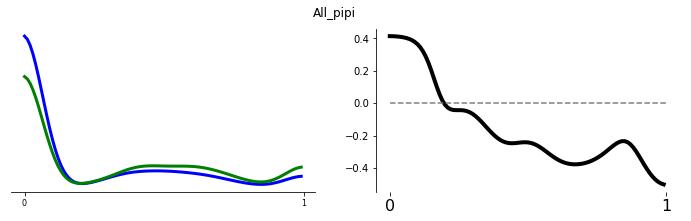

In [4]:
protein = 'All'
for interaction in interactions:
    fname = stats_template.format(protein, interaction)
    plot_stats_energy(fname)

mcss


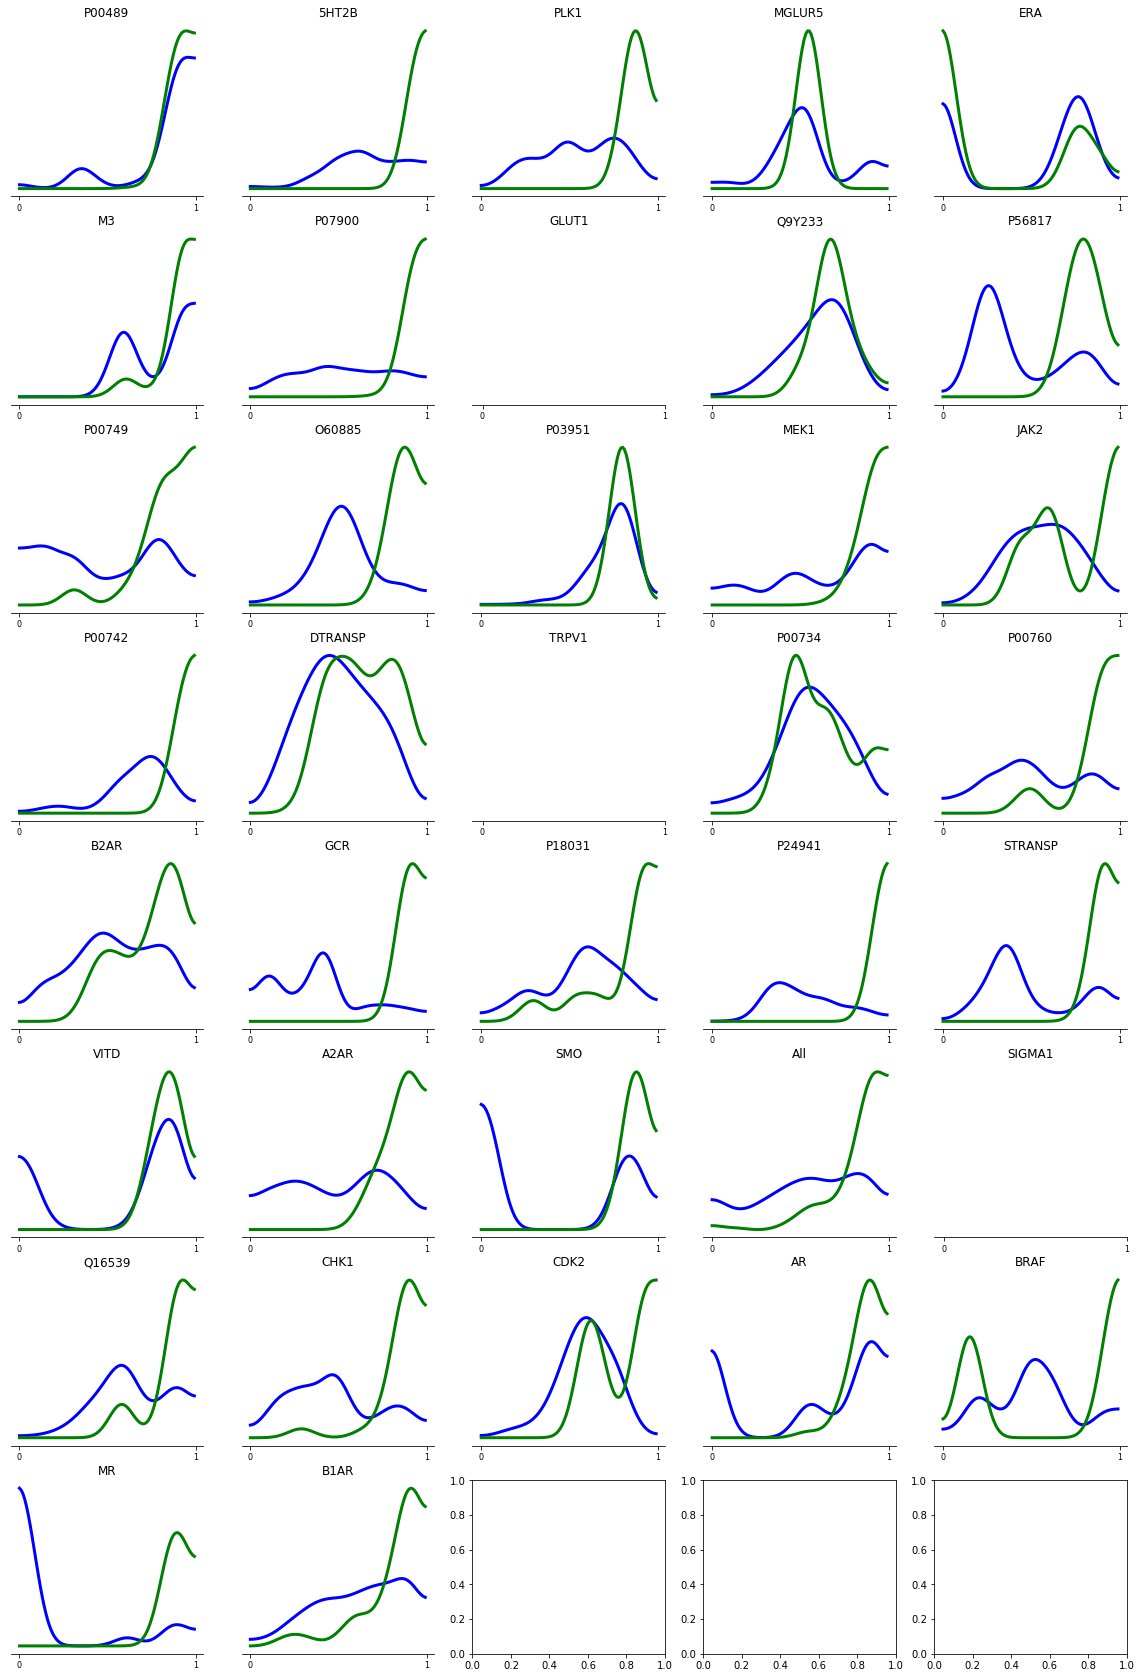

hbond


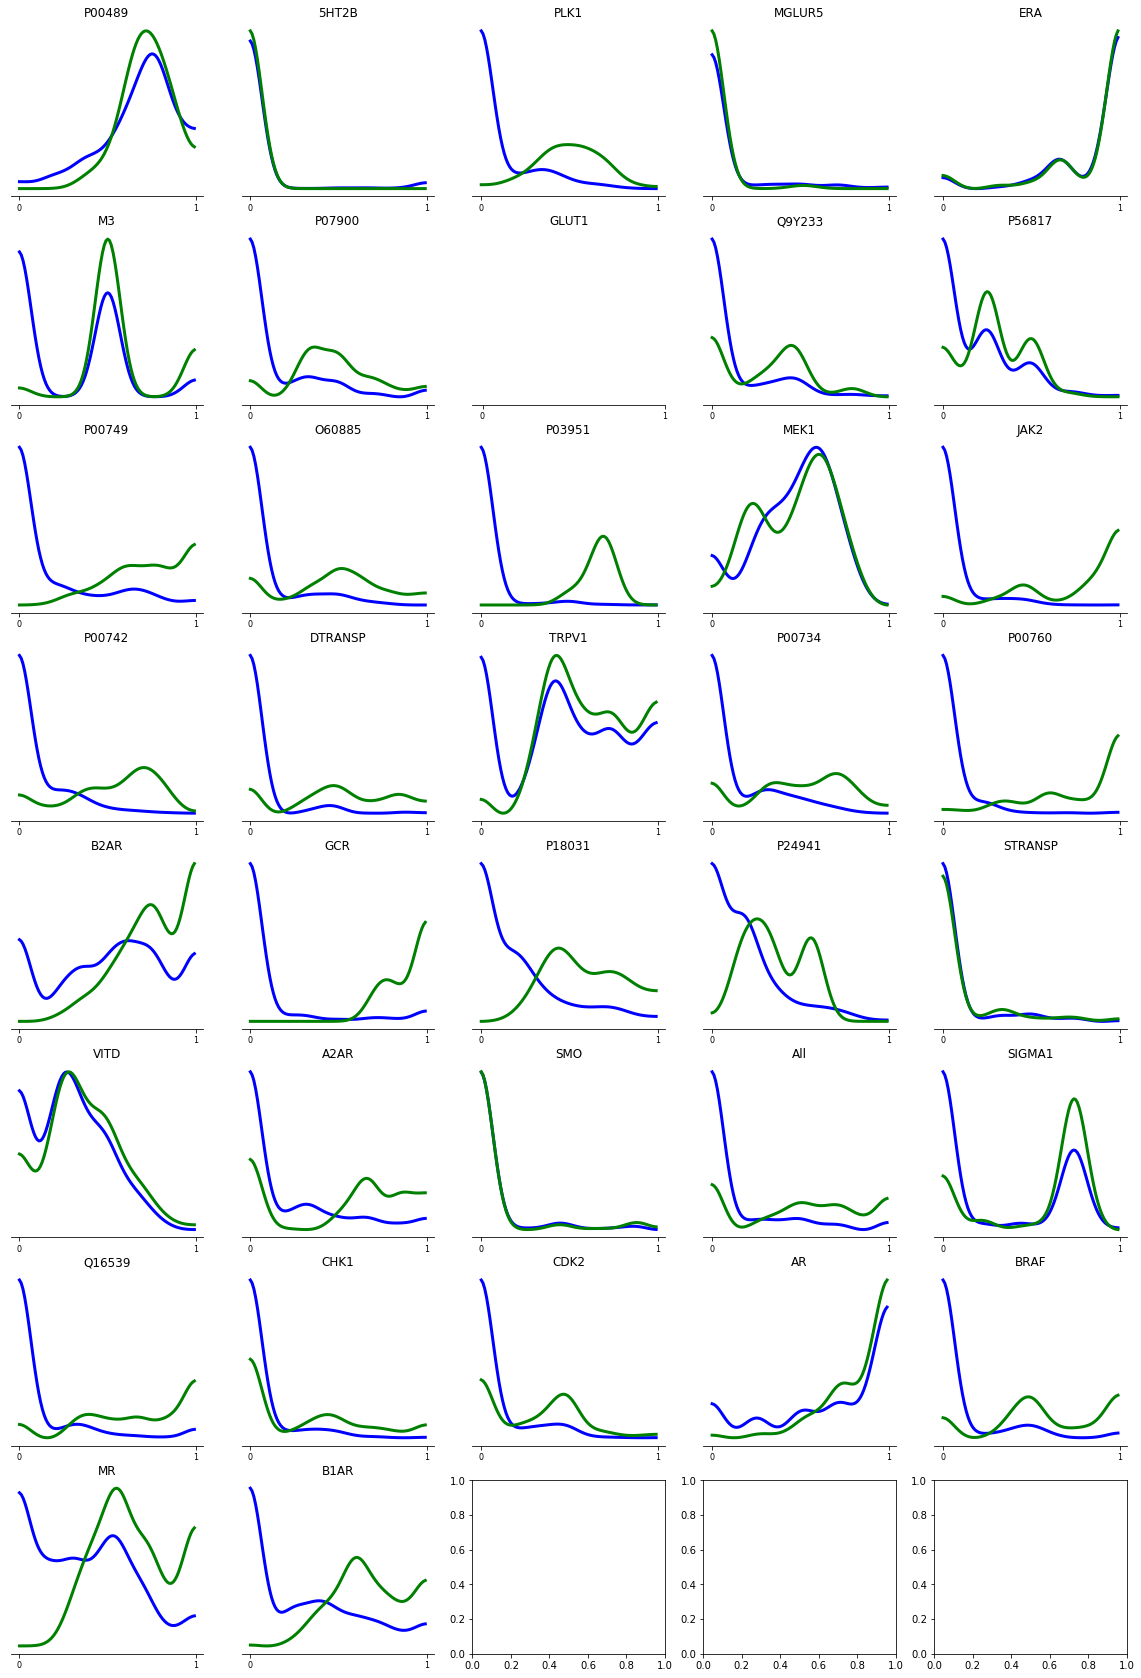

sb2


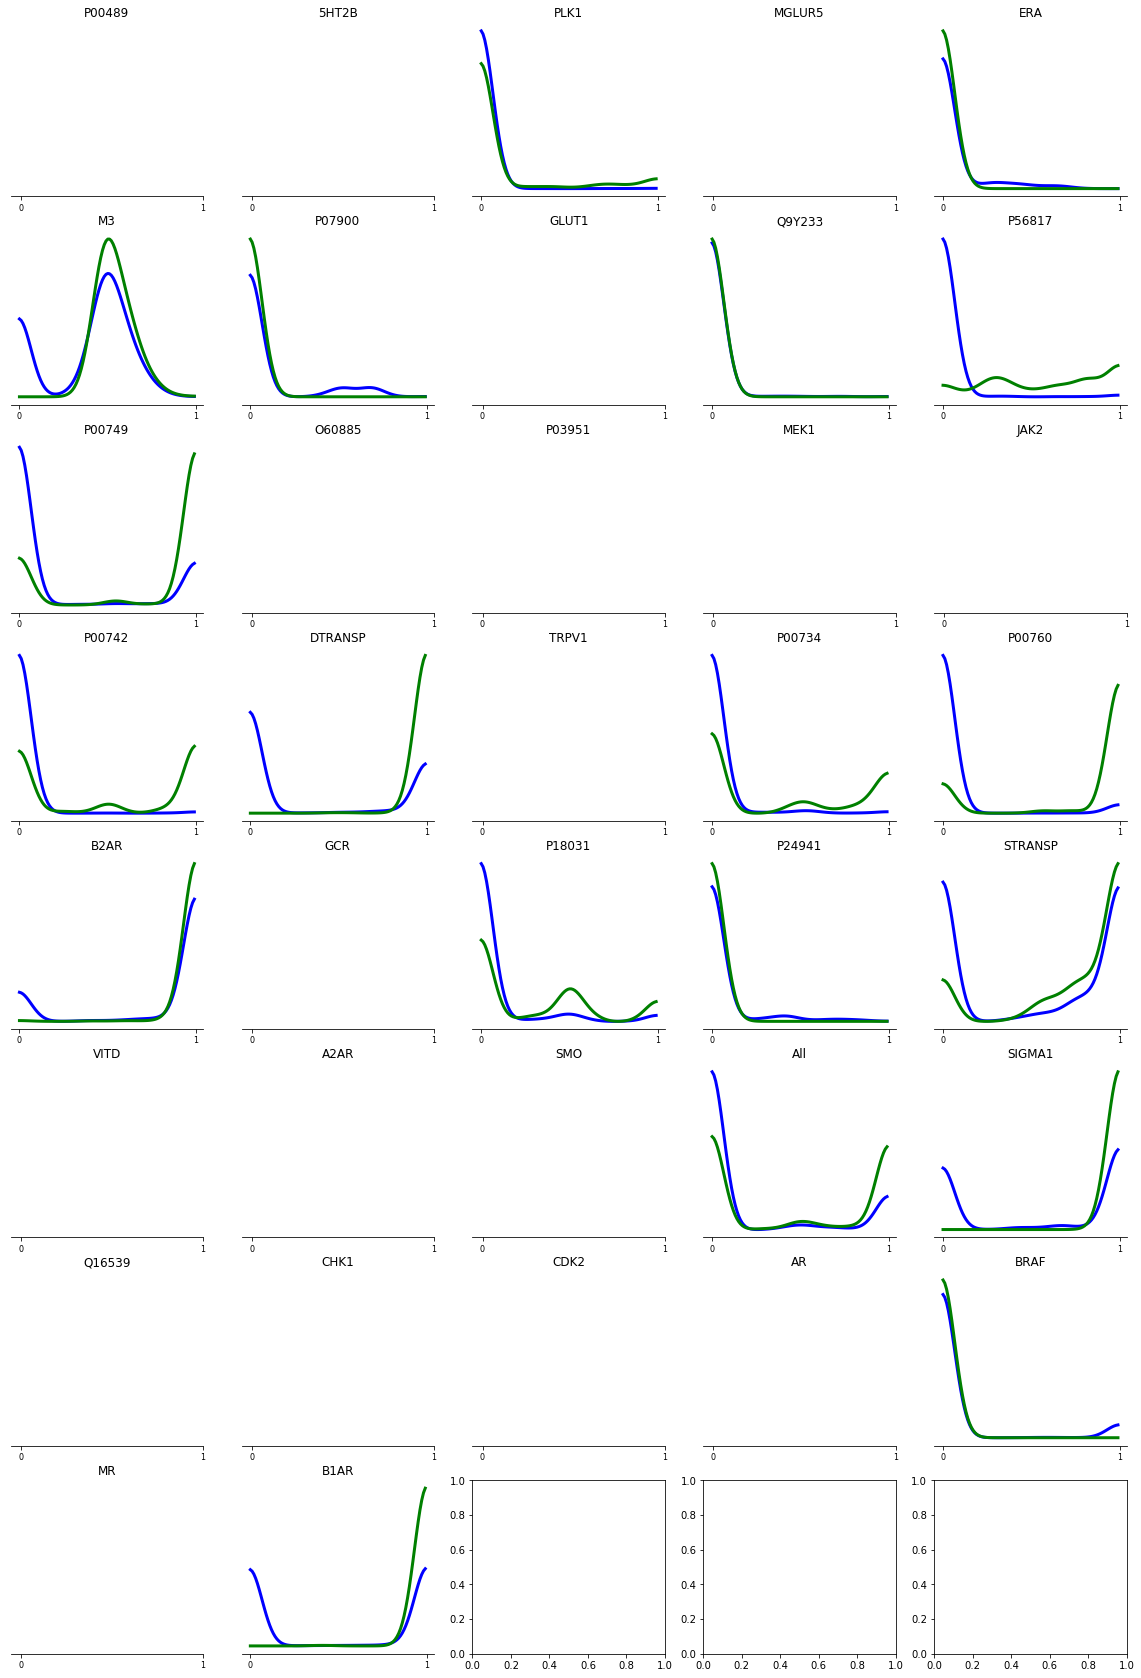

contact


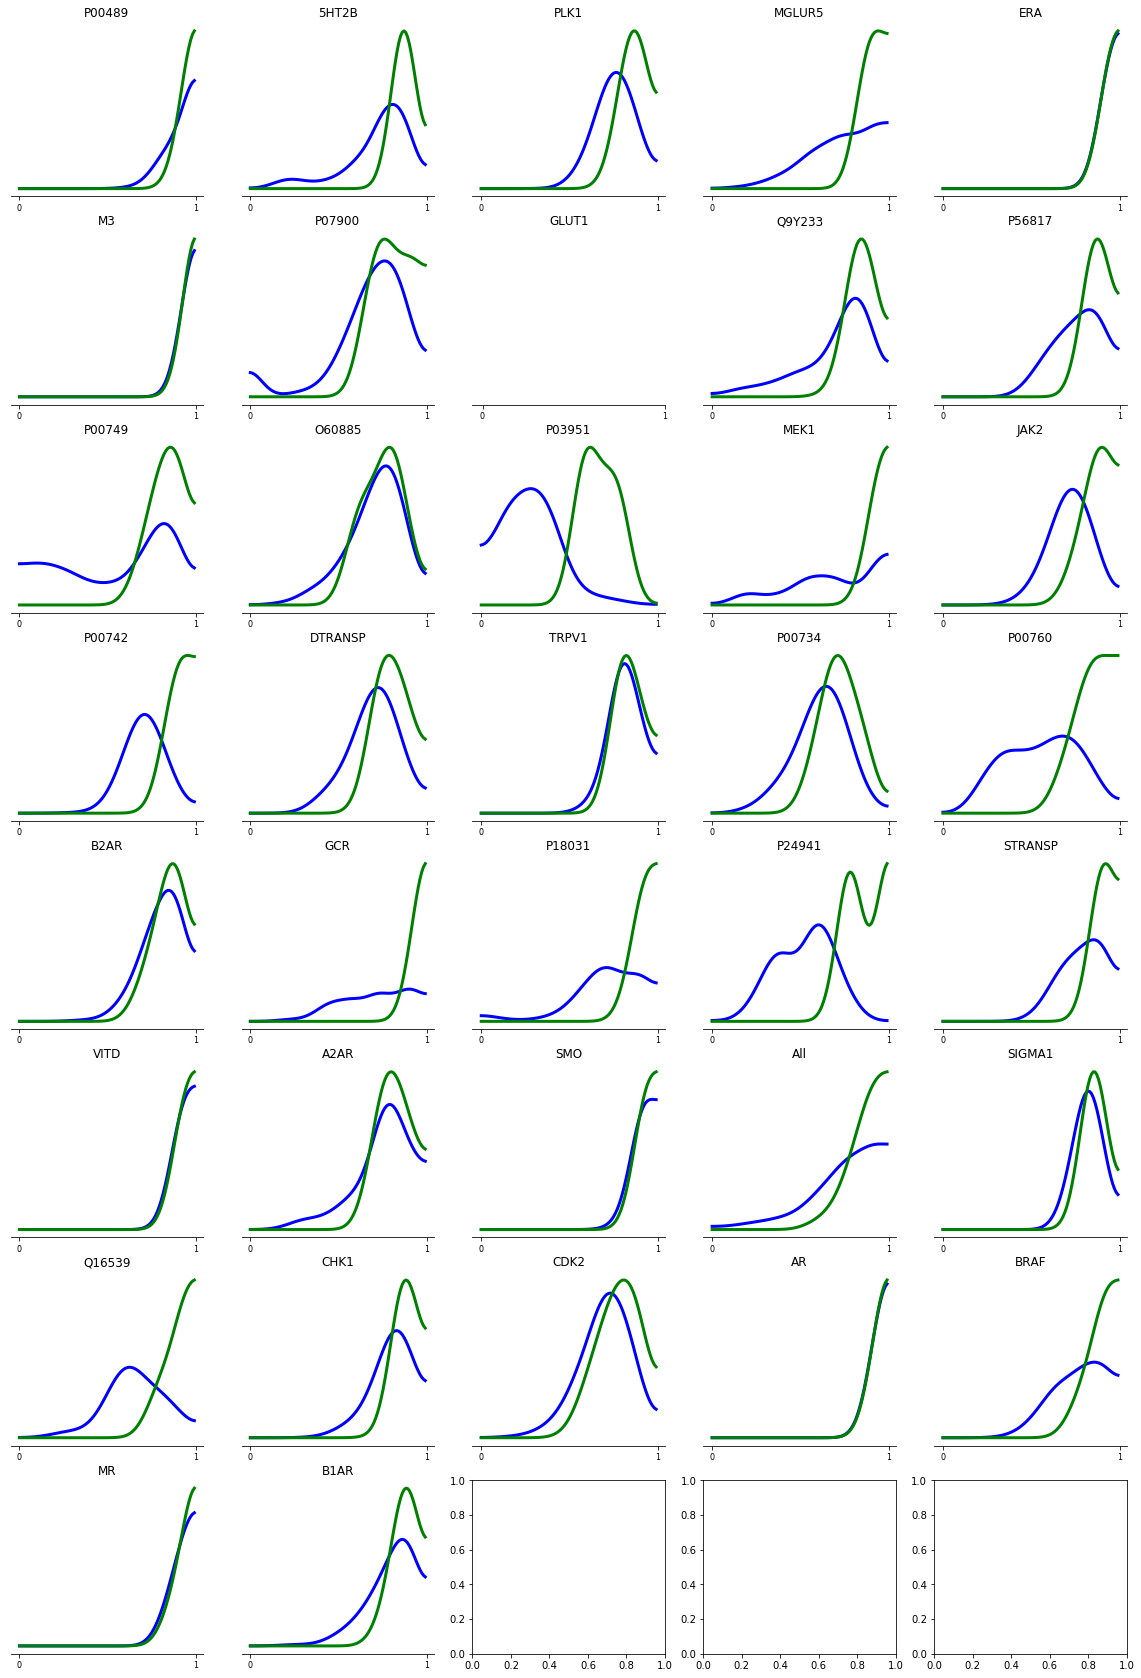

pipi


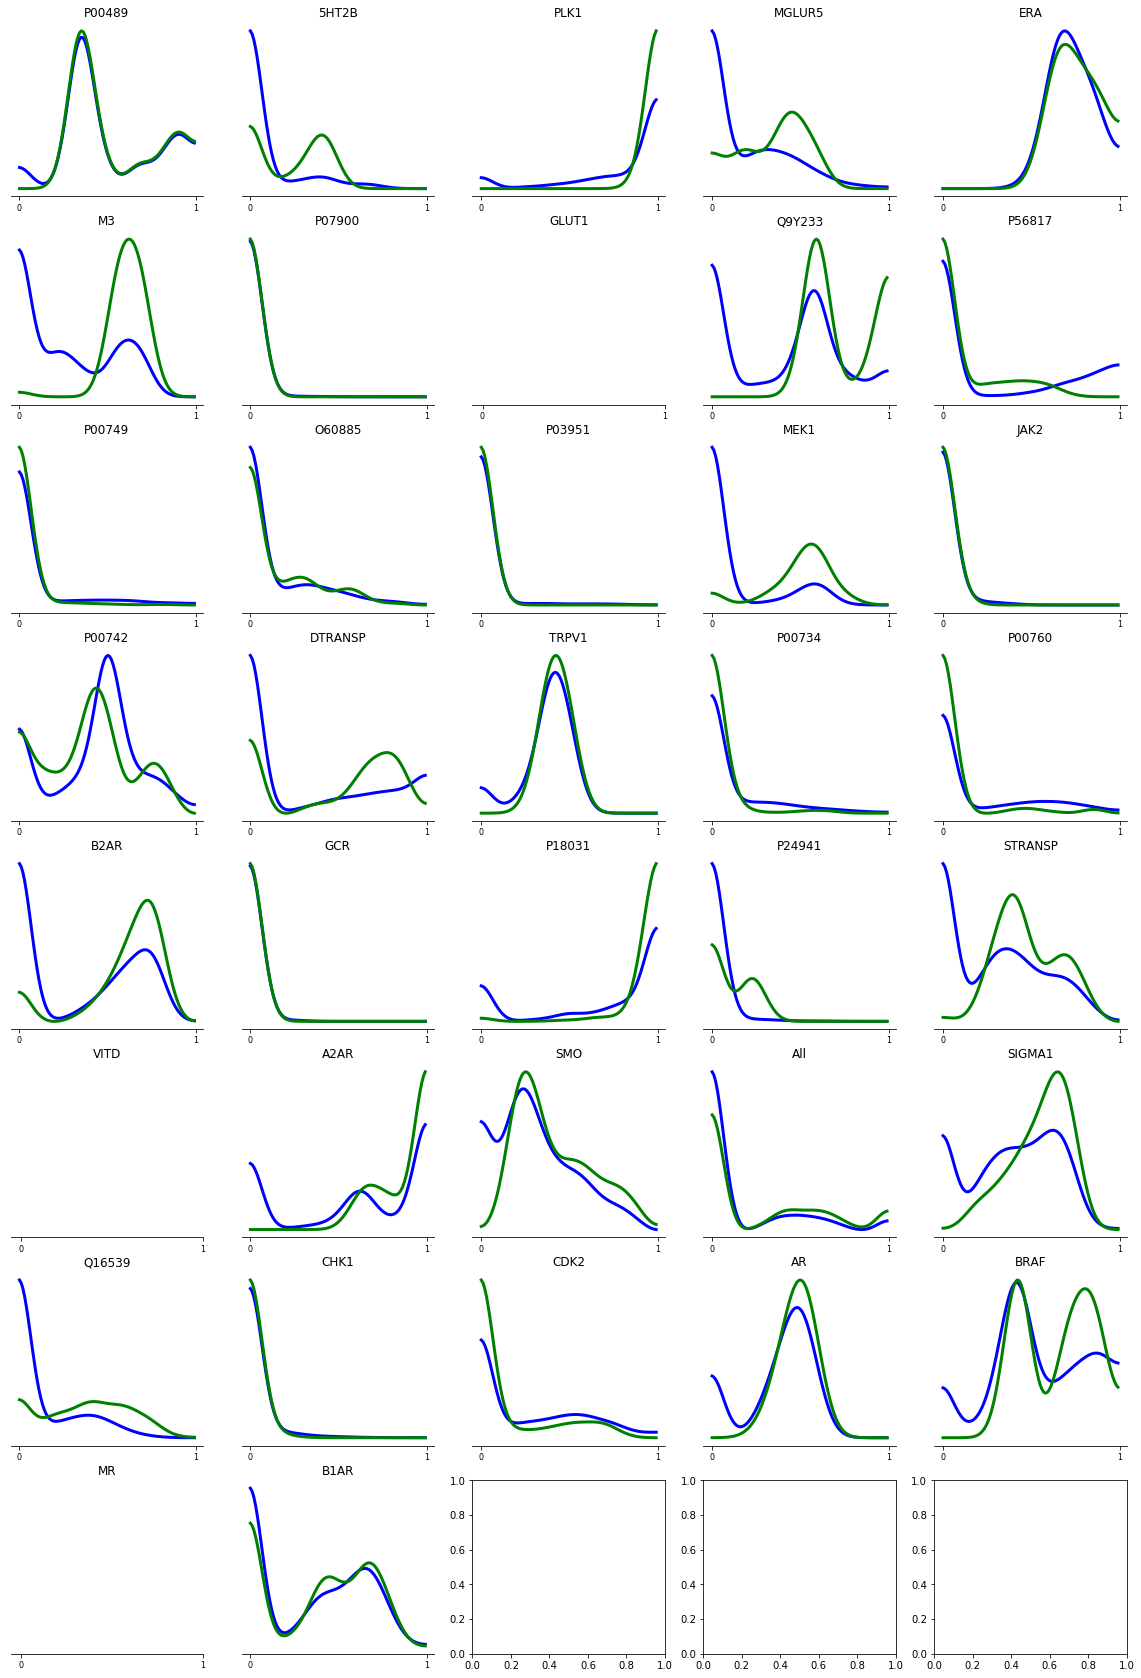

In [5]:
for interaction in interactions:
    f, ax = plt.subplots(8, 5, figsize = (20, 30))
    for c, protein in enumerate(proteins):
        fname = stats_template.format(protein, interaction)
        i = c / 5
        j = c % 5
        X, Y = extract_stats(fname)
        plot_stats(ax[i, j], X, Y)
        ax[i, j].set_title(fname.split('/')[-1].split('_')[0])
    print interaction
    plt.show()

../combind_sherlock/bpp_outputs/stats/JAK2_sb2.txt


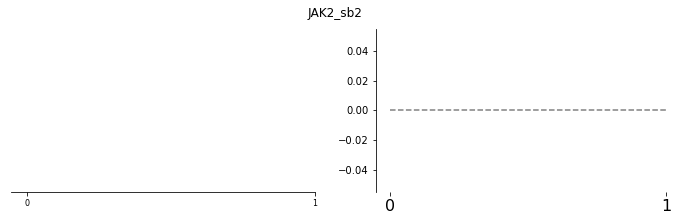

../combind_sherlock/bpp_outputs/stats/JAK2_sb2.txt


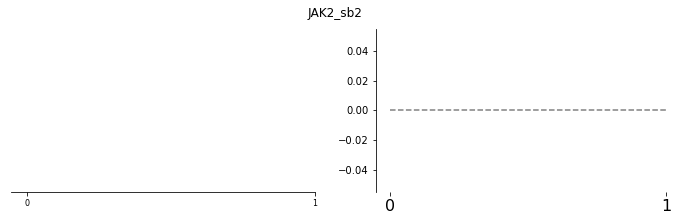

../combind_sherlock/bpp_outputs/stats/JAK2_sb2.txt


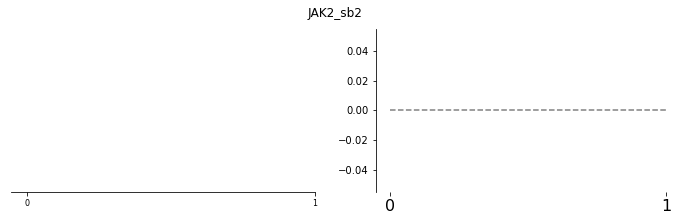

../combind_sherlock/bpp_outputs/stats/JAK2_sb2.txt


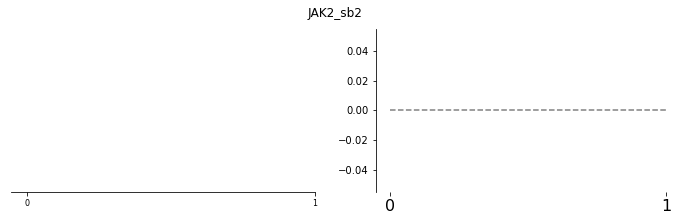

../combind_sherlock/bpp_outputs/stats/JAK2_sb2.txt


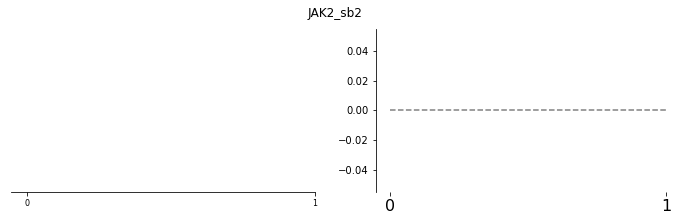

../combind_sherlock/bpp_outputs/stats/JAK2_sb2.txt


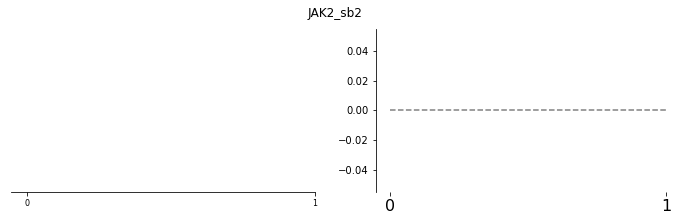

../combind_sherlock/bpp_outputs/stats/JAK2_sb2.txt


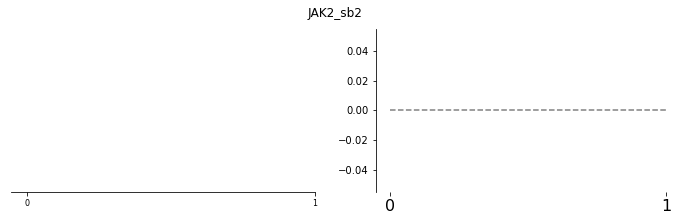

../combind_sherlock/bpp_outputs/stats/JAK2_sb2.txt


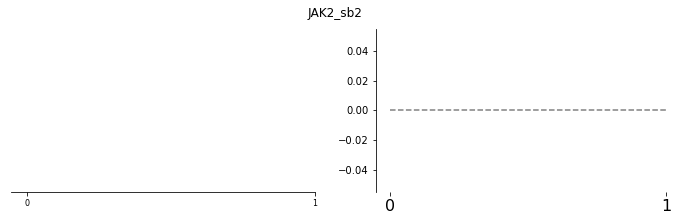

../combind_sherlock/bpp_outputs/stats/JAK2_sb2.txt


KeyboardInterrupt: 

In [6]:
# Plot lig pairs for a specific protein
protein = 'JAK2'
interaction = 'sb2'
for fname in glob('../combind_sherlock/bpp_data/{}/stats/stats4/*{}.txt'.format(protein, interaction)):
    fname = stats_template.format(protein, interaction)
    print fname
    plot_stats_energy(fname)